<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/unsupervised/04_anomaly_detection/02_pyod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Algorytm K-średnich](#3)
5. [Wizualizacja klastrów](#4)




### <a name='0'></a> Import bibliotek

In [1]:
!pip install -q pyod

     |████████████████████████████████| 92kB 3.1MB/s 
     |████████████████████████████████| 2.1MB 9.5MB/s 


In [0]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pyod.models.abod import ABOD
from pyod.models.knn import KNN

from pyod.utils.data import generate_data, get_outliers_inliers

sns.set()
np.random.seed(42)

In [4]:
X_train, X_test, y_train, y_test = generate_data(n_train=300, n_test=200, contamination=0.1,
                                                 n_features=2, random_state=12, behaviour='new')

tmp = pd.DataFrame(data=X_train, columns=['x1', 'x2'])
px.scatter(tmp, x='x1', y='x2', width=950, template='plotly_dark')

In [5]:
model = KNN(n_neighbors=5, contamination=0.1)
model.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [0]:
y_train_pred = model.labels_
y_train_scores = model.decision_scores_

y_test_pred = model.predict(X_test)
y_test_scores = model.decision_function(X_test)

In [7]:
from pyod.utils.data import evaluate_print

evaluate_print('KNN', y_train, y_train_scores)
evaluate_print('KNN', y_test, y_test_scores)

KNN ROC:0.9565, precision @ rank n:0.9
KNN ROC:0.9906, precision @ rank n:0.95


In [8]:
y_train.shape

(300,)

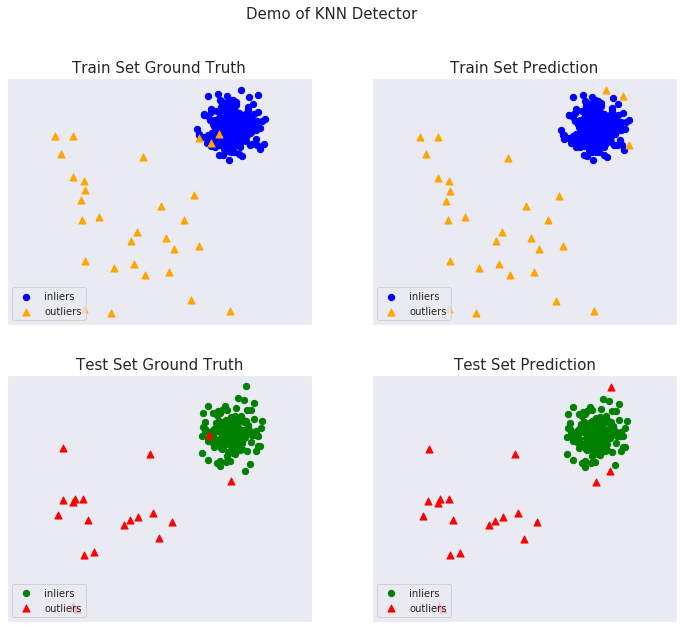

In [9]:
from pyod.utils.example import visualize

visualize('KNN', X_train, y_train, X_test, y_test, y_train_pred, y_test_pred)